In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Preparation

In [2]:
raw_data = pd.read_csv("movie_metadata.csv")

In [3]:
raw_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie = raw_data.iloc[:, [11, 3, 23, 19, 20, 0, 26, 1, 4, 2, 10, 7, 6, 24, 14, 5, 13, 27, 12, 15, 18, 16, 8, 9, 17, 21, 22, 25]]

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   duration                   5028 non-null   float64
 2   title_year                 4935 non-null   float64
 3   language                   5029 non-null   object 
 4   country                    5038 non-null   object 
 5   color                      5024 non-null   object 
 6   aspect_ratio               4714 non-null   float64
 7   director_name              4939 non-null   object 
 8   director_facebook_likes    4939 non-null   float64
 9   num_critic_for_reviews     4993 non-null   float64
 10  actor_1_name               5036 non-null   object 
 11  actor_1_facebook_likes     5036 non-null   float64
 12  actor_2_name               5030 non-null   object 
 13  actor_2_facebook_likes     5030 non-null   float

In [6]:
movie["title_year"] = movie["title_year"].astype(str).replace("nan", np.nan).replace('\.0', '', regex=True)

In [7]:
movie["aspect_ratio"].value_counts()

aspect_ratio
2.35     2360
1.85     1906
1.78      110
1.37      100
1.33       68
1.66       64
16.00      45
2.39       15
2.20       15
4.00        7
2.00        5
2.40        3
2.76        3
1.75        3
1.50        2
2.55        2
2.24        1
1.77        1
1.18        1
1.44        1
1.20        1
1.89        1
Name: count, dtype: int64

In [8]:
movie["aspect_ratio"] = movie["aspect_ratio"].astype(str).replace("nan", np.nan)

In [9]:
numerical = movie.select_dtypes(include=np.number).columns
numerical

Index(['duration', 'director_facebook_likes', 'num_critic_for_reviews',
       'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'movie_facebook_likes', 'num_voted_users', 'facenumber_in_poster',
       'num_user_for_reviews', 'gross', 'budget', 'imdb_score'],
      dtype='object')

In [10]:
categorical = movie.select_dtypes(exclude=np.number).columns
categorical

Index(['movie_title', 'title_year', 'language', 'country', 'color',
       'aspect_ratio', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'plot_keywords', 'genres', 'movie_imdb_link',
       'content_rating'],
      dtype='object')

In [11]:
print(numerical.shape, categorical.shape)

(14,) (14,)


The population is all movies that have an imdb score, the sample is the movies which are in this dataset. There are 5043 observations and 28 variables, 14 of which are numerical variables.

### 2. Data Preprocessing

#### 2.1. Data Summarization

##### 2.1.1. Numerical Variables 

In [12]:
movie.describe()

,duration,director_facebook_likes,num_critic_for_reviews,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_voted_users,facenumber_in_poster,num_user_for_reviews,gross,budget,imdb_score
count,5028.000000,4939.000000,4993.000000,5036.000000,5030.000000,5020.000000,5043.000000,5043.000000,5.043000e+03,5030.000000,5022.000000,4.159000e+03,4.551000e+03,5043.000000
mean,107.201074,686.509212,140.194272,6560.047061,1651.754473,645.009761,9699.063851,7525.964505,8.366816e+04,1.371173,272.770808,4.846841e+07,3.975262e+07,6.442138
std,25.197441,2813.328607,121.601675,15020.759120,4042.438863,1665.041728,18163.799124,19320.445110,1.384853e+05,2.013576,377.982886,6.845299e+07,2.061149e+08,1.125116
min,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,0.000000,1.000000,1.620000e+02,2.180000e+02,1.600000
25%,93.000000,7.000000,50.000000,614.000000,281.000000,133.000000,1411.000000,0.000000,8.593500e+03,0.000000,65.000000,5.340988e+06,6.000000e+06,5.800000
50%,103.000000,49.000000,110.000000,988.000000,595.000000,371.500000,3090.000000,166.000000,3.435900e+04,1.000000,156.000000,2.551750e+07,2.000000e+07,6.600000
75%,118.000000,194.500000,195.000000,11000.000000,918.000000,636.000000,13756.500000,3000.000000,9.630900e+04,2.000000,326.000000,6.230944e+07,4.500000e+07,7.200000
max,511.000000,23000.000000,813.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,1.689764e+06,43.000000,5060.000000,7.605058e+08,1.221550e+10,9.500000


Histogram plot of numerical variables

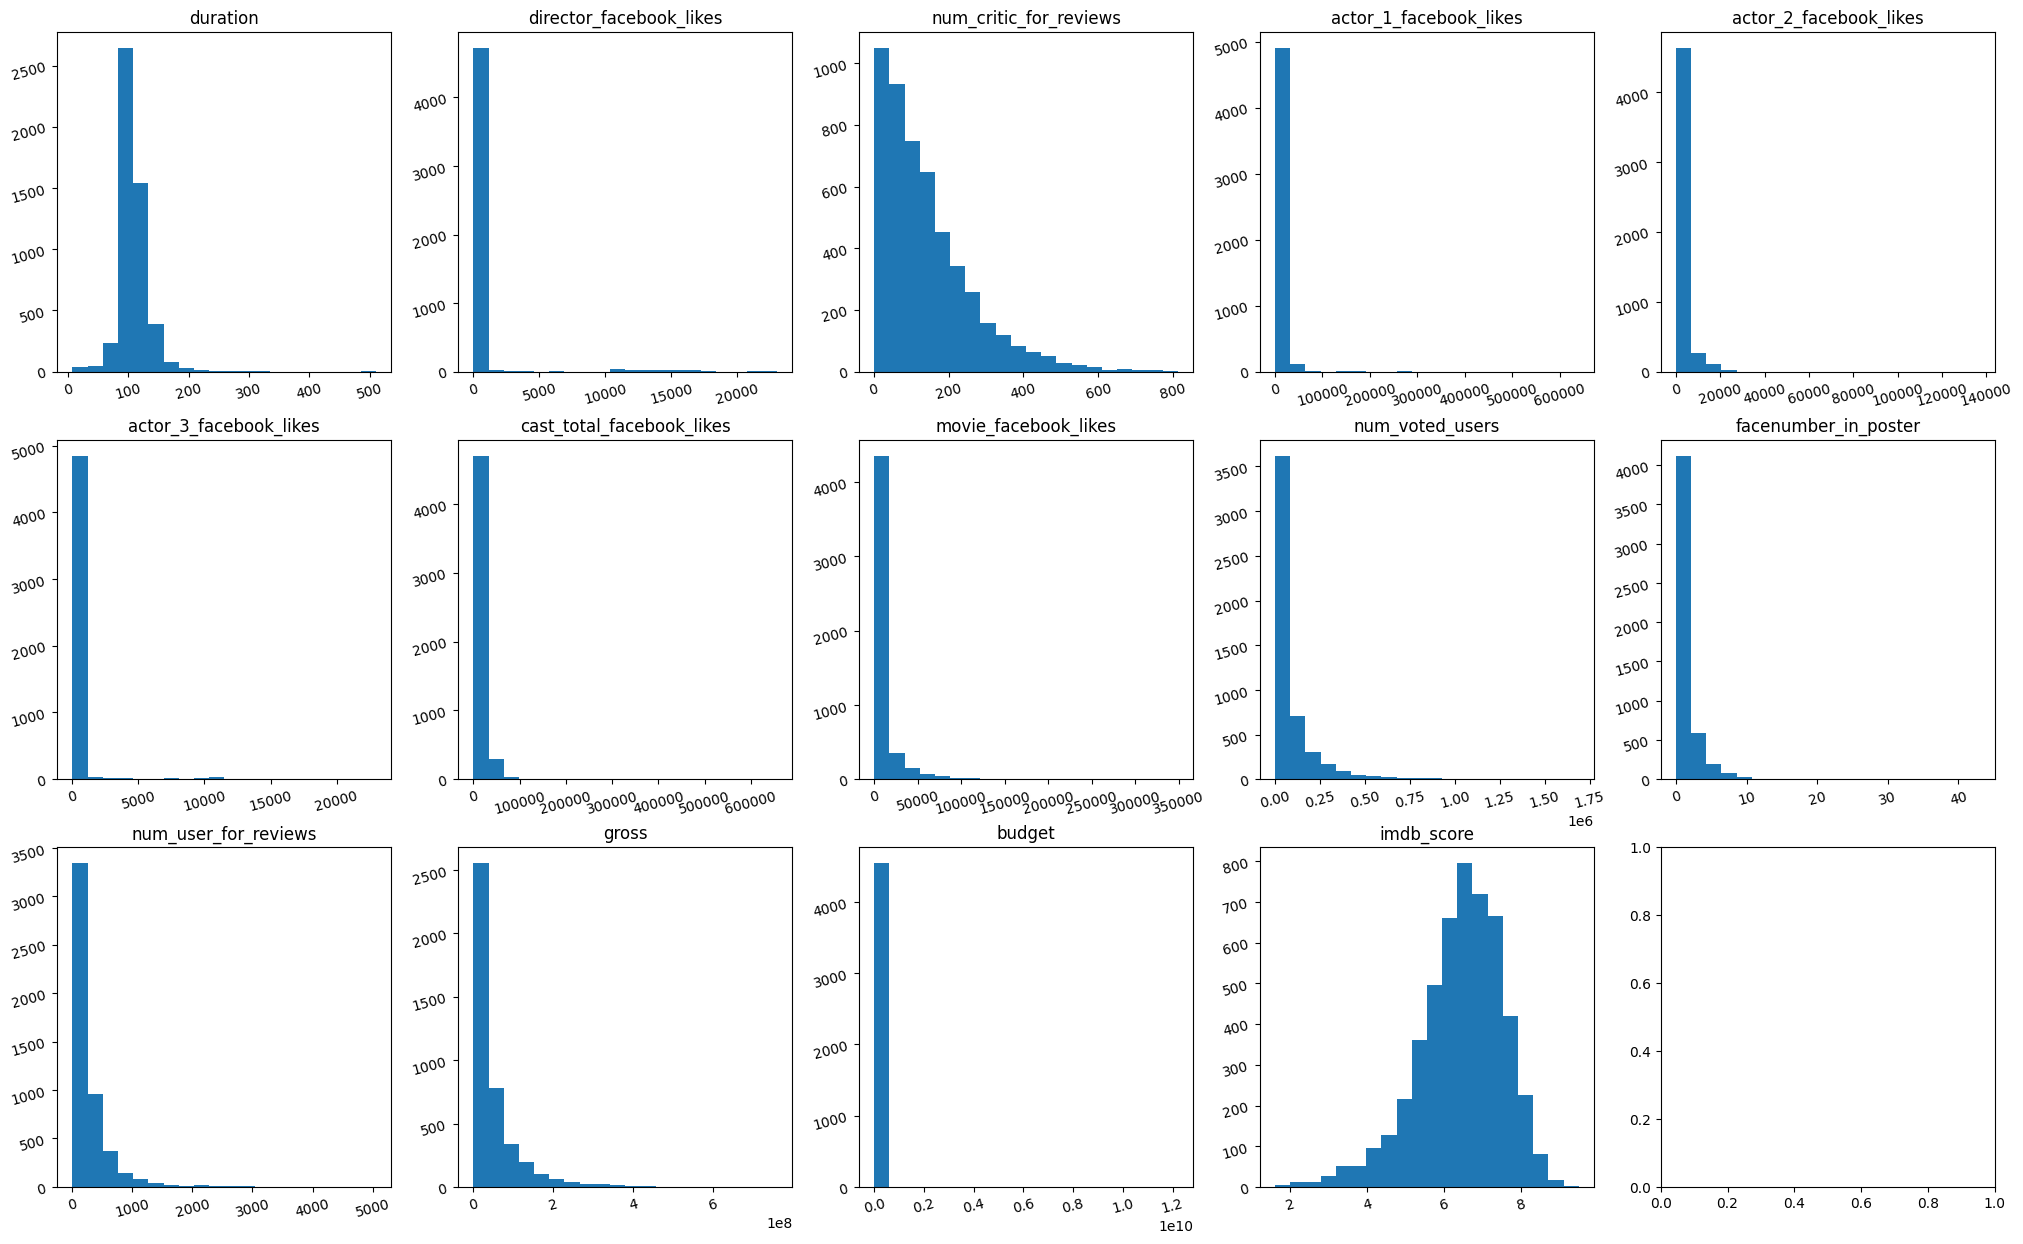

In [13]:
fig, axs = plt.subplots(3, 5, figsize=(25, 15))
i = 0
for colname in numerical:
  axs[i // 5, i % 5].hist(movie[colname], bins=20)
  axs[i // 5, i % 5].title.set_text(colname)
  axs[i // 5, i % 5].tick_params(labelrotation=15)
  i += 1

* `duration`, `imdb_score` looks like a **Gaussian**.
* `num_critic_for_reviews`, `actor_1_facebook_likes`, `actor_2_facebook_likes`, `cast_total_facebook_likes`, `movie_facebook_likes`, `num_voted_users`, `facenumber_in_poster`, `num_user_for_reviews` and `gross` look like an exponential r.v.'s PDF.

##### 2.1.2. Categorical Variables

In [14]:
movie.describe(include="object")

,movie_title,title_year,language,country,color,aspect_ratio,director_name,actor_1_name,actor_2_name,actor_3_name,plot_keywords,genres,movie_imdb_link,content_rating
count,5043,4935,5029,5038,5024,4714,4939,5036,5030,5020,4890,5043,5043,4740
unique,4917,91,46,65,2,22,2398,2097,3032,3521,4760,914,4919,18
top,Ben-Hur,2009,English,USA,Color,2.35,Steven Spielberg,Robert De Niro,Morgan Freeman,John Heard,based on novel,Drama,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,R
freq,3,260,4704,3807,4815,2360,26,49,20,8,4,236,3,2118


Clearly, `movie_title` and `movie_imdb_link` won't be our variable of interest.

`director_name`, `actor_1_name`, `actor_2_name`, `actor_3_name`

In [15]:
movie["director_name"].value_counts()[:20]

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Tim Burton           16
Steven Soderbergh    16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Joel Schumacher      13
Michael Bay          13
Robert Rodriguez     13
Barry Levinson       13
Sam Raimi            13
Robert Zemeckis      13
John Carpenter       13
Ron Howard           13
Shawn Levy           12
Kevin Smith          12
Name: count, dtype: int64

In [16]:
movie["actor_1_name"].value_counts()[:20]

actor_1_name
Robert De Niro        49
Johnny Depp           41
Nicolas Cage          33
J.K. Simmons          31
Bruce Willis          30
Denzel Washington     30
Matt Damon            30
Liam Neeson           29
Steve Buscemi         27
Robin Williams        27
Harrison Ford         27
Robert Downey Jr.     26
Bill Murray           26
Jason Statham         26
Tom Cruise            25
Morgan Freeman        25
Keanu Reeves          24
Tom Hanks             24
Christian Bale        23
Scarlett Johansson    22
Name: count, dtype: int64

In [17]:
movie["actor_2_name"].value_counts()[:20]

actor_2_name
Morgan Freeman         20
Charlize Theron        15
Brad Pitt              14
James Franco           11
Meryl Streep           11
Jason Flemyng          10
Adam Sandler           10
Thomas Kretschmann      9
Scott Glenn             9
Robert Duvall           9
Judy Greer              9
Angelina Jolie Pitt     9
Will Ferrell            9
Bruce Willis            9
Steve Buscemi           9
Zooey Deschanel         8
Olivia Wilde            8
Udo Kier                8
Kate Winslet            8
Jada Pinkett Smith      8
Name: count, dtype: int64

In [18]:
movie["actor_3_name"].value_counts()[:20]

actor_3_name
John Heard             8
Steve Coogan           8
Ben Mendelsohn         8
Anne Hathaway          7
Robert Duvall          7
Lois Maxwell           7
Jon Gries              7
Sam Shepard            7
Kirsten Dunst          7
Stephen Root           7
Paul Sorvino           6
Kevin Pollak           6
Kevin Dunn             6
Clifton Collins Jr.    6
Ellen Barkin           6
Reg E. Cathey          6
Hope Davis             6
John Gielgud           6
Joan Allen             6
Steve Carell           6
Name: count, dtype: int64

`title_year`

In [19]:
min_yr, max_yr = int(movie["title_year"].astype(np.float64).min()), int(movie["title_year"].astype(np.float64).max())
min_yr, max_yr

(1916, 2016)

In [20]:
movie["title_year"].value_counts()[:10]

title_year
2009    260
2014    252
2006    239
2013    237
2010    230
2015    226
2011    225
2008    225
2012    221
2005    221
Name: count, dtype: int64

In [21]:
movie["title_year"].value_counts()[-10:]

title_year
1950    1
1941    1
1930    1
1927    1
1935    1
1932    1
1916    1
1934    1
1925    1
1920    1
Name: count, dtype: int64

`language`

In [22]:
movie["language"].value_counts().head()

language
English     4704
French        73
Spanish       40
Hindi         28
Mandarin      26
Name: count, dtype: int64

The majority of movies in our dataset has language **English**.

`country`

In [24]:
movie["country"].value_counts().head()

country
USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: count, dtype: int64

The majority of movies in our dataset is from **USA**.

`genres`

In [25]:
movie["genres"].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [26]:
genres_lst = []
[genres_lst.extend(_) for _ in movie["genres"].str.split("|")]
len(genres_lst)

14504

In [27]:
genres_lst = np.array(genres_lst)
genres, genre_counts = np.unique(genres_lst, return_counts=True)

In [28]:
genres = pd.DataFrame({"genres": genres, "count": genre_counts})
genres

,genres,count
0,Action,1153
1,Adventure,923
2,Animation,242
3,Biography,293
4,Comedy,1872
5,Crime,889
6,Documentary,121
7,Drama,2594
8,Family,546
9,Fantasy,610


There are *26* distinct genres.

In [29]:
genres.sort_values(by="count", ascending=False, inplace=True)
genres.head()

,genres,count
7,Drama,2594
4,Comedy,1872
23,Thriller,1411
0,Action,1153
19,Romance,1107


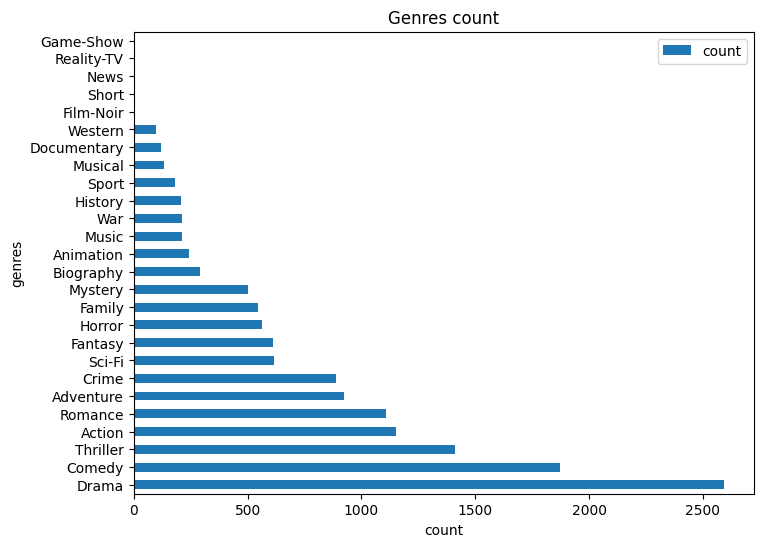

In [30]:
genres.plot(x="genres", y="count", kind="barh", figsize=(8, 6), title="Genres count", xlabel="count");

5 most popular genres: **Drama**, **Comedy**, **Thriller**, **Action**, **Romance**.

`plot_keywords`

In [31]:
movie["plot_keywords"].head()

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [32]:
keywords_lst = []
[keywords_lst.extend(_) for _ in movie.loc[~movie["plot_keywords"].isnull(), "plot_keywords"].str.split("|")]
len(keywords_lst)

24097

In [33]:
keywords_lst = np.array(keywords_lst)
keywords, keywords_counts = np.unique(keywords_lst, return_counts=True)

In [34]:
keywords = pd.DataFrame({"plot keywords": keywords, "count": keywords_counts})
keywords.head()

,plot keywords,count
0,10 year old,1
1,1000000 b.c.,1
2,1190s,1
3,12 step program,2
4,12 year old,2


In [35]:
keywords.shape[0]

8086

There are *8086* distinct keywords.

In [36]:
keywords.sort_values(by="count", ascending=False, inplace=True)
keywords.head(10)

,plot keywords,count
4156,love,198
2838,friend,166
4668,murder,161
1865,death,132
5399,police,126
4838,new york city,91
3308,high school,89
215,alien,82
6219,school,73
944,boy,72


In [37]:
keywords.tail(10)

,plot keywords,count
3329,highwayman,1
3327,highway,1
3326,highlands,1
3325,highlander,1
3323,high standards,1
3322,high society,1
3320,high school sweethearts,1
3317,high school romance,1
3315,high school prom,1
4043,lightning bolt,1


The 5 most popular keywords are **love**, **friend**, **murder**, **death**, **police**.

In [38]:
keywords.describe()

,count
count,8086.000000
mean,2.980089
std,6.866802
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,198.000000


`content_rating`

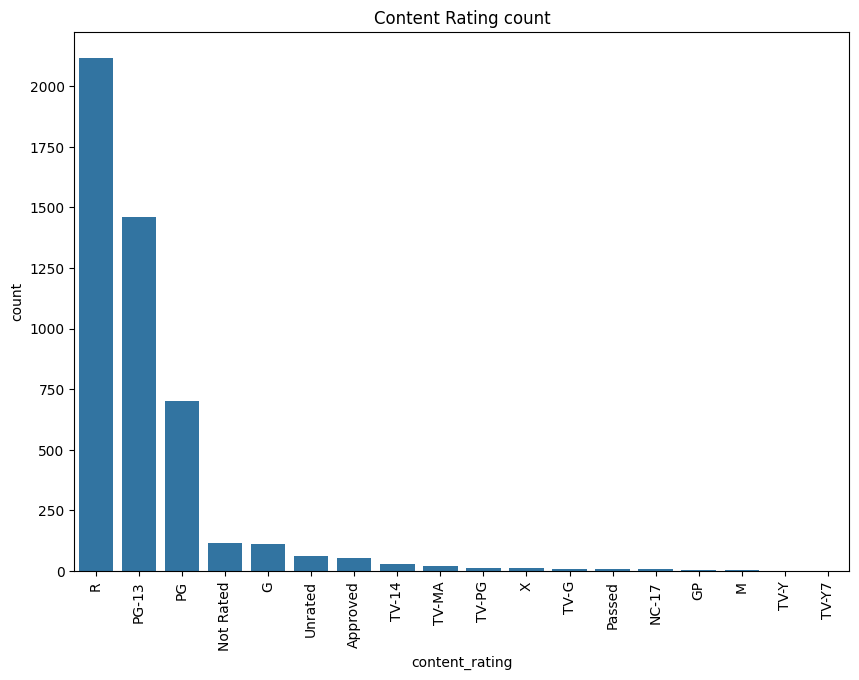

In [39]:
plt.figure(figsize=(10, 7))
plt.title("Content Rating count")
sns.countplot(movie, x="content_rating", order=movie["content_rating"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

2 most popular ratings are **R** and **PG-13**

#### 2.2. Data Cleasing

##### 2.2.1. Resolve data missing

In [40]:
na_count = movie.isnull().sum()
na_count

movie_title                    0
duration                      15
title_year                   108
language                      14
country                        5
color                         19
aspect_ratio                 329
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
num_voted_users                0
facenumber_in_poster          13
num_user_for_reviews          21
plot_keywords                153
gross                        884
genres                         0
movie_imdb_link                0
content_rating               303
budget                       492
imdb_score                     0
dtype: int64

In [41]:
na_count / movie.shape[0]

movie_title                  0.000000
duration                     0.002974
title_year                   0.021416
language                     0.002776
country                      0.000991
color                        0.003768
aspect_ratio                 0.065239
director_name                0.020623
director_facebook_likes      0.020623
num_critic_for_reviews       0.009915
actor_1_name                 0.001388
actor_1_facebook_likes       0.001388
actor_2_name                 0.002578
actor_2_facebook_likes       0.002578
actor_3_name                 0.004561
actor_3_facebook_likes       0.004561
cast_total_facebook_likes    0.000000
movie_facebook_likes         0.000000
num_voted_users              0.000000
facenumber_in_poster         0.002578
num_user_for_reviews         0.004164
plot_keywords                0.030339
gross                        0.175292
genres                       0.000000
movie_imdb_link              0.000000
content_rating               0.060083
budget      

We apply the simple strategy: replace N/A values with median on numerical columns, and replace N/A values with mode on categorical columns.

In [42]:
movie.loc[:, numerical] = movie.loc[:, numerical].fillna(movie.loc[:, numerical].median())

In [43]:
movie.loc[:, categorical] = movie.loc[:, categorical].fillna(movie.loc[:, categorical].mode().loc[0, :])

In [44]:
movie.isnull().sum()

movie_title                  0
duration                     0
title_year                   0
language                     0
country                      0
color                        0
aspect_ratio                 0
director_name                0
director_facebook_likes      0
num_critic_for_reviews       0
actor_1_name                 0
actor_1_facebook_likes       0
actor_2_name                 0
actor_2_facebook_likes       0
actor_3_name                 0
actor_3_facebook_likes       0
cast_total_facebook_likes    0
movie_facebook_likes         0
num_voted_users              0
facenumber_in_poster         0
num_user_for_reviews         0
plot_keywords                0
gross                        0
genres                       0
movie_imdb_link              0
content_rating               0
budget                       0
imdb_score                   0
dtype: int64

##### 2.2.2. Outlier Detection and Noise Removal

The dataset should not contain negative value.

In [45]:
(movie[numerical] < 0).sum().sum()

0

Imdb score must not exceed 10

In [46]:
(movie["imdb_score"] > 10).sum()

0

Now we shall plot the boxplots

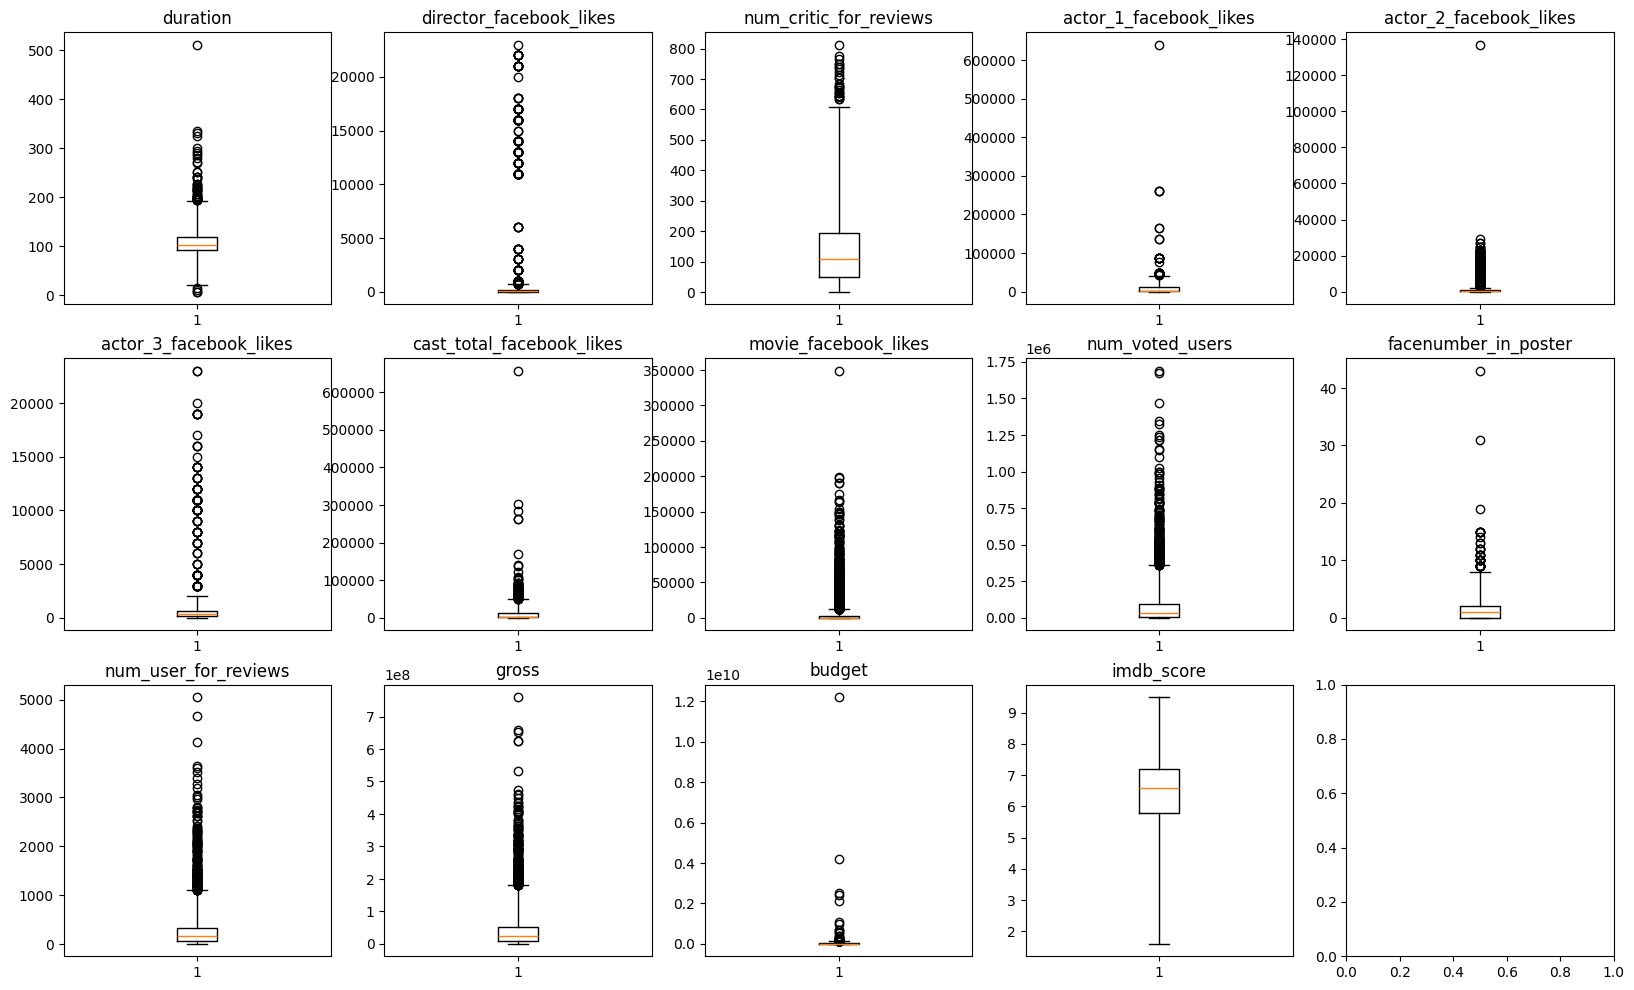

In [47]:
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
i = 0
for colname in numerical:
  axs[i // 5, i % 5].boxplot(movie[colname], whis = 3)
  axs[i // 5, i % 5].title.set_text(colname)
  i += 1

I take `whis=3`, so anything beyond the whiskers is extreme outlier.

It can be observed that `imdb_score` has no extreme outlier at all.

In [48]:
def outlier_counts(df):
  num_df = df.select_dtypes(include=np.number)
  Q1 = num_df[numerical].quantile(0.25)
  Q3 = num_df[numerical].quantile(0.75)
  IQR = Q3 - Q1

  return ((num_df < (Q1 - 3 * IQR)) | (num_df > (Q3 + 3 * IQR))).sum()

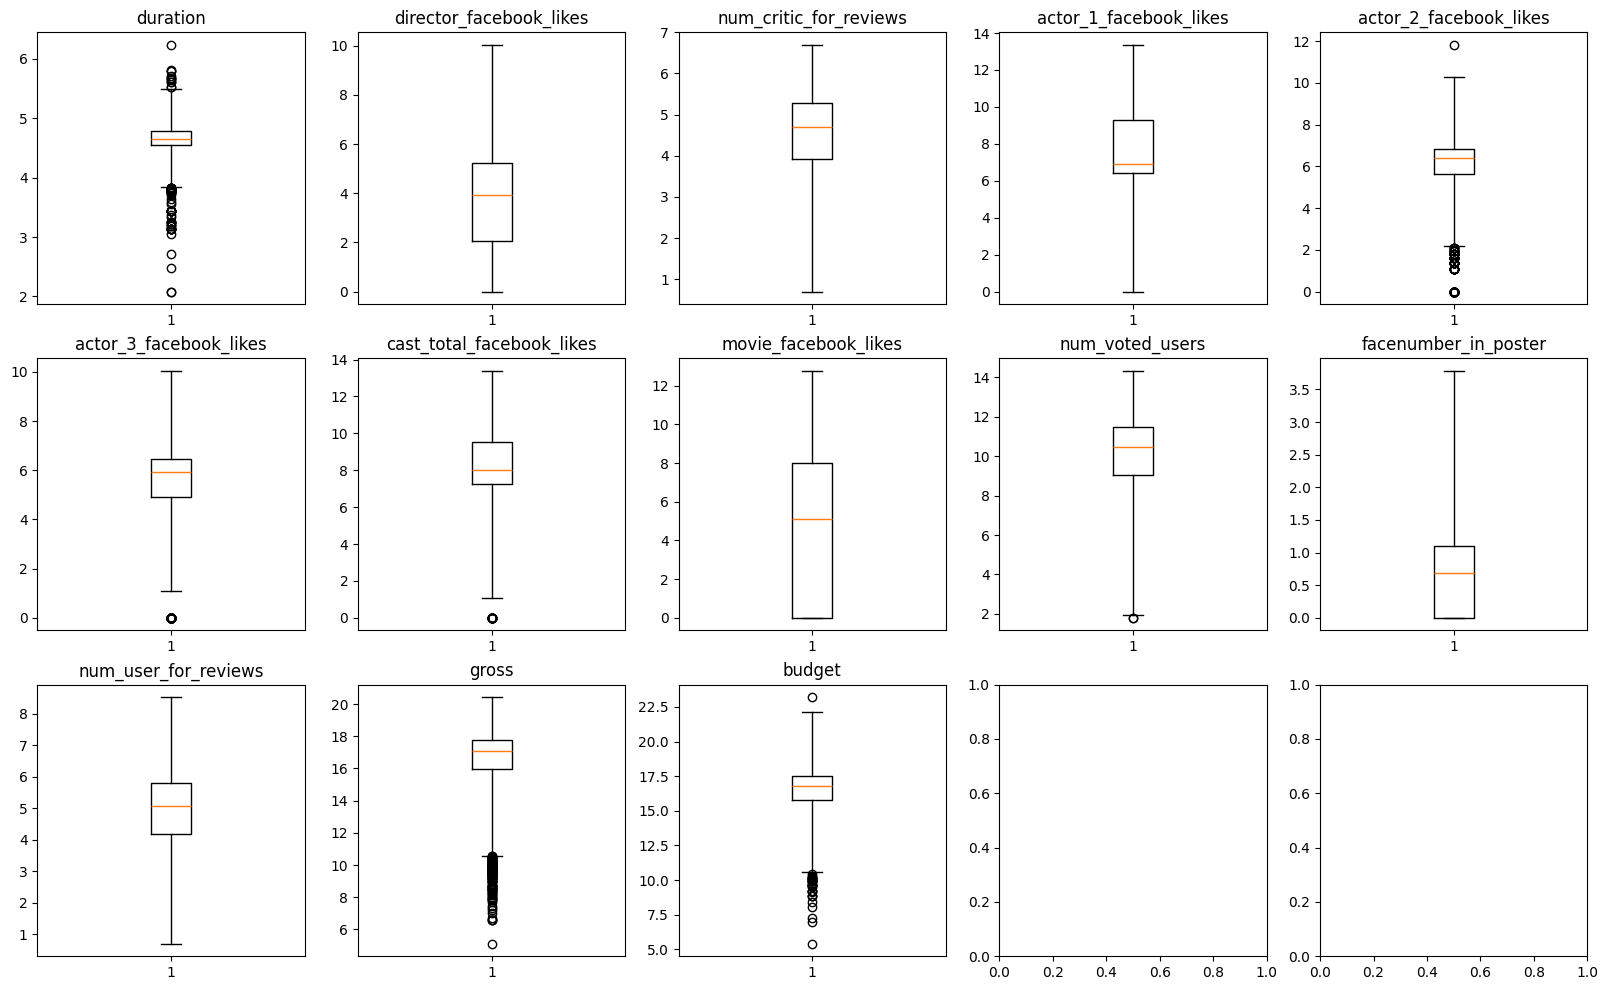

In [49]:
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
i = 0
for colname in numerical:
  if colname !="imdb_score":
    axs[i // 5, i % 5].boxplot(np.log(movie[colname] + 1), whis = 3)
    axs[i // 5, i % 5].title.set_text(colname)
  i += 1

In [50]:
pd.concat([outlier_counts(movie), outlier_counts(np.log(movie[numerical] + 1))], axis=1)

,0,1
duration,49,81
director_facebook_likes,351,0
num_critic_for_reviews,27,0
actor_1_facebook_likes,52,0
actor_2_facebook_likes,538,117
actor_3_facebook_likes,146,89
cast_total_facebook_likes,110,33
movie_facebook_likes,930,0
num_voted_users,220,2
facenumber_in_poster,49,0


It can be seen that log normalization does work for most columns, the outliers disappear or decreases drastically. So we shall apply log normalization on columns `director_facebook_likes`, `num_critics_for_reviews`, `actor_1_facebook_likes`, `actor_2_facebook_likes`, `actor_3_facebook_likes`, `cast_total_facebook_likes`, `movie_facebook_likes`, `num_voted_users`, `facenumber_in_poster`, `num_user_for_reviews`, `gross`, `budget`, i.e. the columns whose number of outliers decrease.

##### 2.2.3. Resolve Data Inconsistency

First, we drop duplicated rows

In [51]:
movie.duplicated().sum()

45

In [52]:
movie.drop_duplicates(inplace=True)

Then, we check whether there is duplicated movie title.

In [53]:
movie["movie_title"].unique().shape

(4917,)

In [54]:
movie["movie_title"].value_counts()[movie["movie_title"].value_counts() > 1]

movie_title
Ben-Hur                           3
Home                              3
King Kong                         3
A Nightmare on Elm Street         2
The Fast and the Furious          2
                                 ..
Snitch                            2
Poltergeist                       2
Skyfall                           2
The Return of the Living Dead     2
Heist                             2
Name: count, Length: 78, dtype: int64

In [55]:
movie.loc[movie["movie_title"].str.match("Ben-Hur"), categorical]

,movie_title,title_year,language,country,color,aspect_ratio,director_name,actor_1_name,actor_2_name,actor_3_name,plot_keywords,genres,movie_imdb_link,content_rating
367,Ben-Hur,2016,English,USA,Color,2.35,Timur Bekmambetov,Morgan Freeman,Ayelet Zurer,Moises Arias,based on novel,Adventure|Drama|History,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,PG-13
2613,Ben-Hur,2016,English,USA,Color,2.35,Timur Bekmambetov,Morgan Freeman,Ayelet Zurer,Moises Arias,chariot race|epic|false accusation|jerusalem|s...,Adventure|Drama|History,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,PG-13
3967,Ben-Hur,2016,English,USA,Color,2.35,Timur Bekmambetov,Morgan Freeman,Ayelet Zurer,Moises Arias,chariot race|epic|false accusation|jerusalem|s...,Adventure|Drama|History,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,PG-13


In [56]:
movie.loc[movie["movie_title"].str.match("Ben-Hur"), numerical]

,duration,director_facebook_likes,num_critic_for_reviews,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_voted_users,facenumber_in_poster,num_user_for_reviews,gross,budget,imdb_score
367,141.0,335.0,1.0,11000.0,745.0,635.0,13379,0,57,2.0,1.0,25517500.0,20000000.0,6.1
2613,141.0,335.0,1.0,11000.0,744.0,635.0,13390,0,62,2.0,1.0,25517500.0,100000000.0,6.1
3967,141.0,335.0,1.0,11000.0,744.0,635.0,13391,0,67,2.0,1.0,25517500.0,100000000.0,6.0


Now we drop rows that have duplicated movie title,

In [57]:
movie.drop_duplicates(subset=["movie_title"], inplace=True)

The `movie_title` column contains unique values, so we will drop it later on.

#### 2.3 Data Reduction

Clearly, the `movie_imdb_link` is redundant.

In [58]:
movie["movie_imdb_link"].unique().shape

(4917,)

In [59]:
movie.drop(columns=["movie_title", "movie_imdb_link"], inplace=True)

We shall also remove the `director_name`, `actor_1_name`, `actor_2_name` and `actor_3_name`

##### 2.3.1. Correlation between 2 Numerical Features

In [60]:
corrmat = movie[numerical].corr()
corrmat

,duration,director_facebook_likes,num_critic_for_reviews,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_voted_users,facenumber_in_poster,num_user_for_reviews,gross,budget,imdb_score
duration,1.000000,0.164039,0.253554,0.087377,0.130467,0.120652,0.120706,0.195180,0.311747,0.014917,0.321570,0.225008,0.135317,0.263681
director_facebook_likes,0.164039,1.000000,0.187575,0.092506,0.119524,0.121925,0.121055,0.165158,0.302827,-0.040762,0.229185,0.144303,0.046524,0.165958
num_critic_for_reviews,0.253554,0.187575,1.000000,0.188612,0.280597,0.265599,0.259609,0.682215,0.623191,-0.031869,0.605184,0.476529,0.195801,0.306833
actor_1_facebook_likes,0.087377,0.092506,0.188612,1.000000,0.386466,0.246227,0.953289,0.131248,0.189849,0.071604,0.145773,0.150325,0.057275,0.076777
actor_2_facebook_likes,0.130467,0.119524,0.280597,0.386466,1.000000,0.549727,0.621508,0.239392,0.263653,0.071394,0.217716,0.258687,0.097424,0.083388
actor_3_facebook_likes,0.120652,0.121925,0.265599,0.246227,0.549727,1.000000,0.464654,0.271215,0.278363,0.100612,0.227046,0.294660,0.103737,0.055514
cast_total_facebook_likes,0.120706,0.121055,0.259609,0.953289,0.621508,0.464654,1.000000,0.202955,0.259083,0.090619,0.205132,0.234630,0.086268,0.086767
movie_facebook_likes,0.195180,0.165158,0.682215,0.131248,0.239392,0.271215,0.202955,1.000000,0.537991,0.004637,0.405822,0.372818,0.124066,0.252428
num_voted_users,0.311747,0.302827,0.623191,0.189849,0.263653,0.278363,0.259083,0.537991,1.000000,-0.027862,0.801926,0.637746,0.169252,0.412367
facenumber_in_poster,0.014917,-0.040762,-0.031869,0.071604,0.071394,0.100612,0.090619,0.004637,-0.027862,1.000000,-0.066696,-0.024058,-0.021678,-0.062596


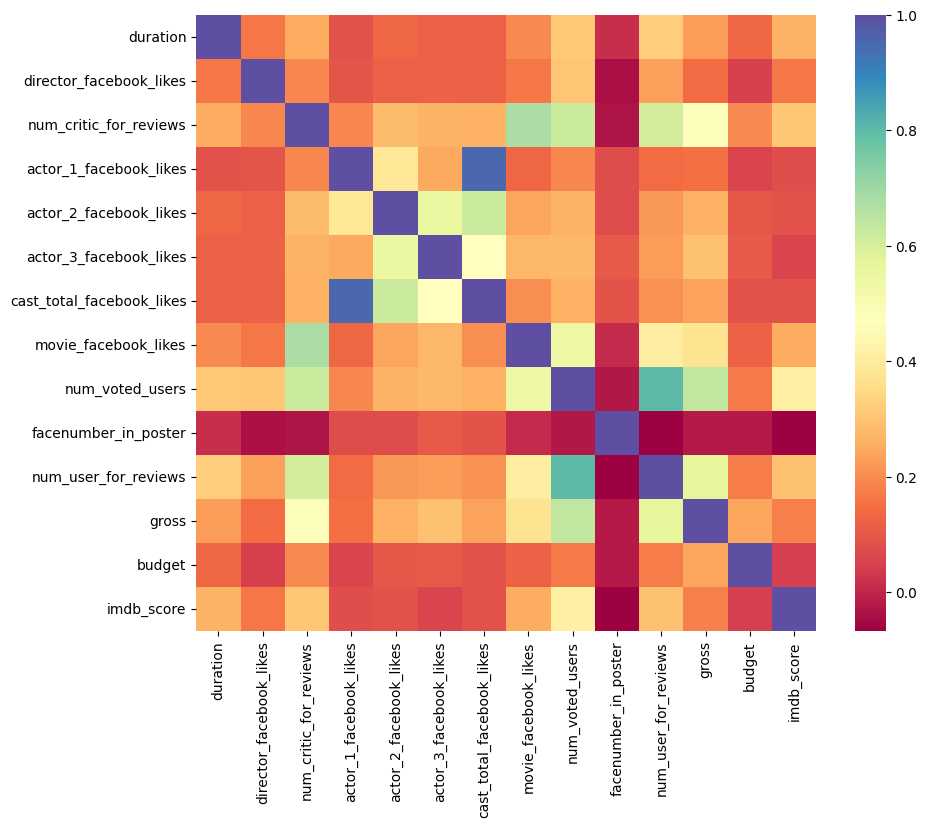

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, cmap="Spectral")
plt.show()

Strong correlation ( > 0.7 )

- `actor_1_facebook_likes` and `cast_total_facebook_likes`
- `num_voted_users` and `num_user_for_reviews`

In [62]:
(corrmat["actor_1_facebook_likes"] > corrmat["cast_total_facebook_likes"]).sum()

1

We can omit the `cast_total_facebook_likes` variable.

In [63]:
movie.drop(columns=["cast_total_facebook_likes"], inplace=True)

In [64]:
(corrmat["num_voted_users"] > corrmat["num_user_for_reviews"]).sum()

11

We drop the `num_voted_users` column.

In [65]:
movie.drop(columns=["num_voted_users"], inplace=True)

##### 2.3.2. Correlation between a Categorical Feature and a Numerical Feature

I claim without proof that a person's name and number of facebook likes are correlated. So I can drop the `...name` columns.

In [66]:
movie.drop(columns=["director_name", "actor_1_name", "actor_2_name", "actor_3_name"], inplace=True)

### 3. Predictive Model

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### 3.1. Data Splitting and Transformation

##### 3.1.1. Data Transformation

First, we apply log normalization to `director_facebook_likes`, `num_critics_for_reviews`, `actor_1_facebook_likes`, `actor_2_facebook_likes`, `actor_3_facebook_likes`, `movie_facebook_likes`, `facenumber_in_poster`, `num_user_for_reviews`, `gross`, `budget`

In [68]:
_ = ["director_facebook_likes", "num_critic_for_reviews", "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "movie_facebook_likes", "facenumber_in_poster", "num_user_for_reviews", "gross", "budget"]

In [69]:
movie[_] = np.log(movie[_] + 1)

In [70]:
movie.rename(columns={x:("log_" + x) for x in _}, inplace=True)

Let's see what happens to the histograms.

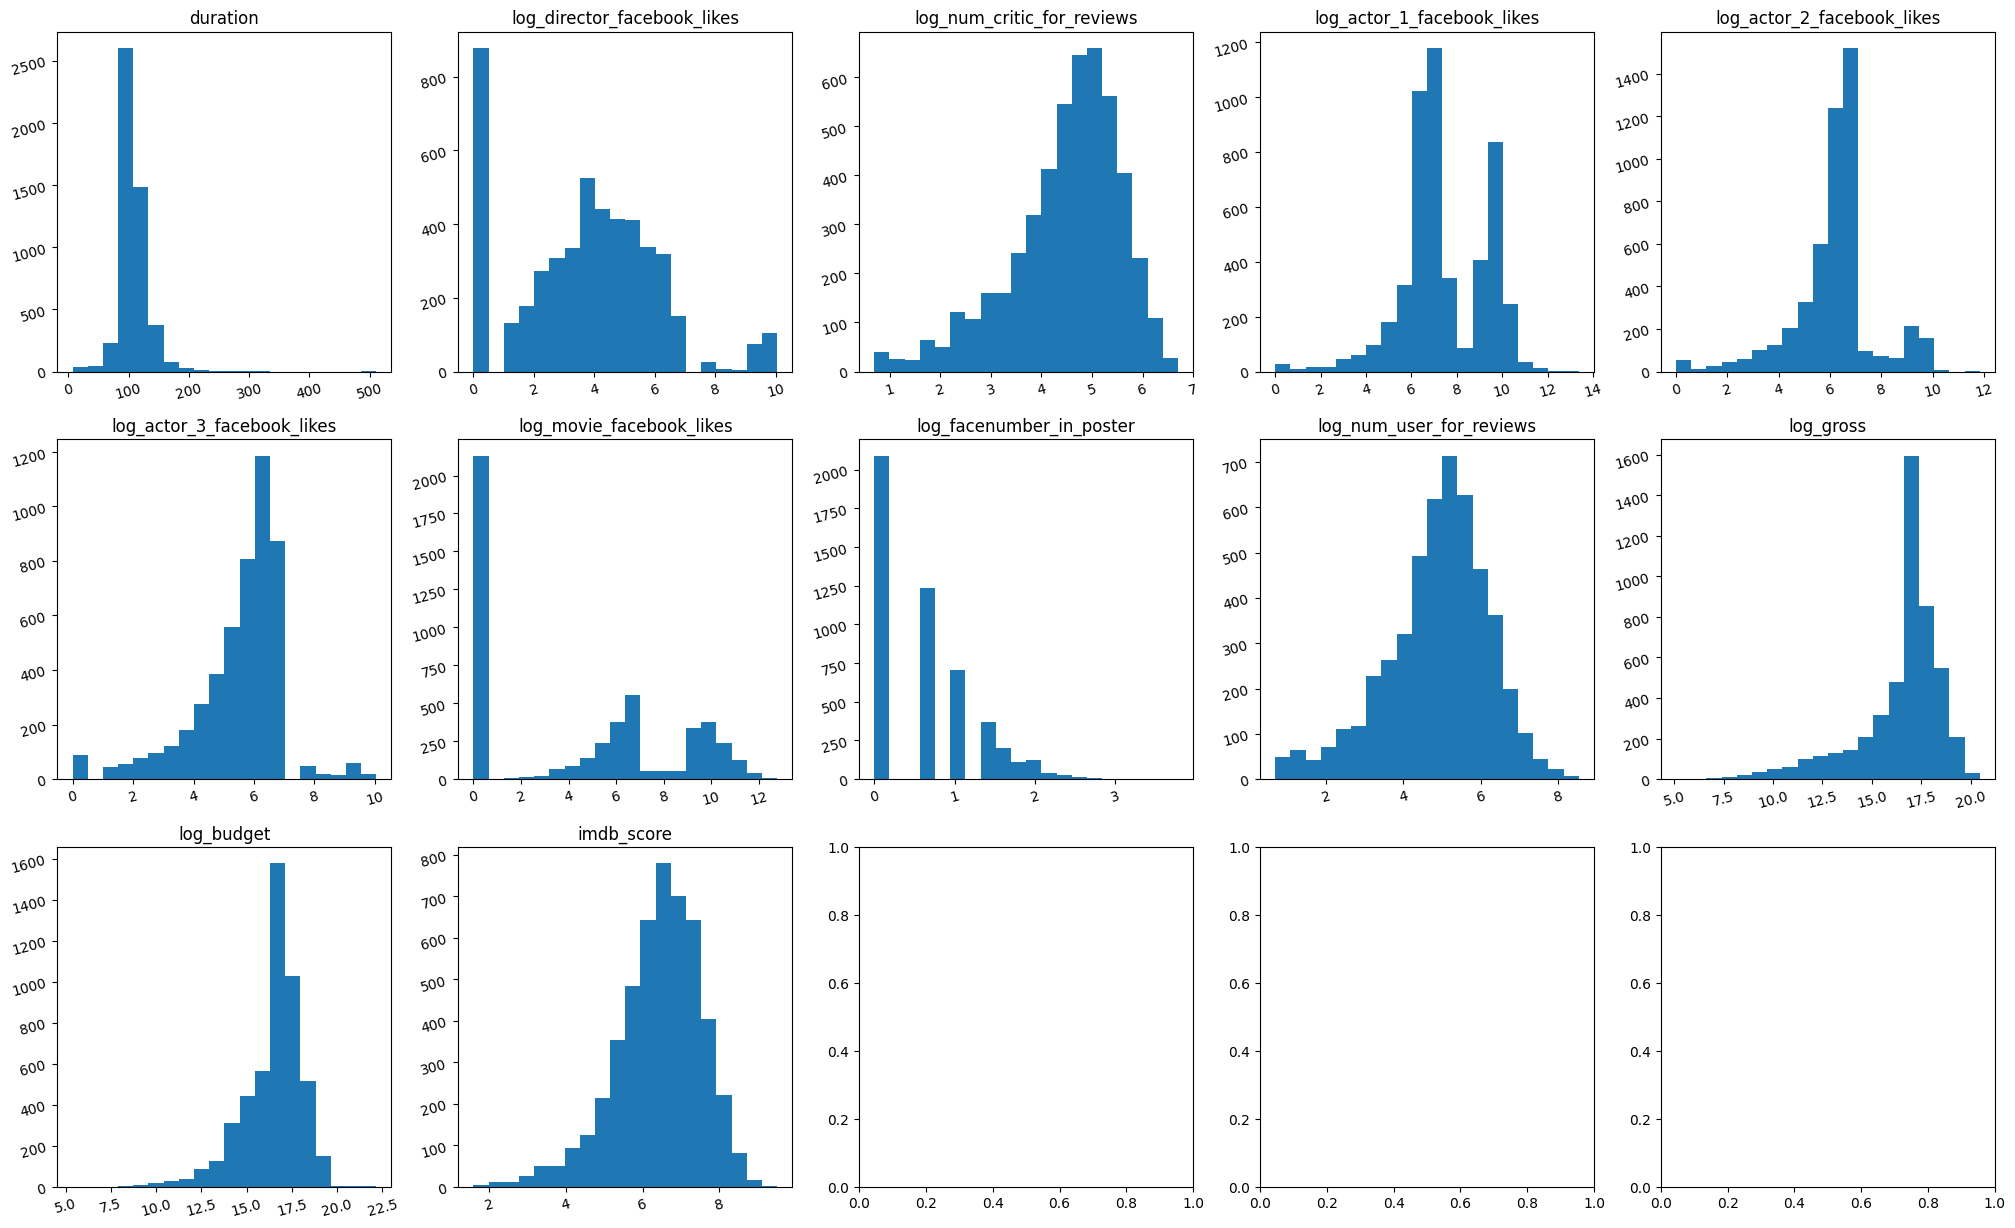

In [71]:
fig, axs = plt.subplots(3, 5, figsize=(25, 15))
i = 0
for colname in movie.select_dtypes(include=np.number):
  axs[i // 5, i % 5].hist(movie[colname], bins=20)
  axs[i // 5, i % 5].title.set_text(colname)
  axs[i // 5, i % 5].tick_params(labelrotation=15)
  i += 1

Now, we turn `title_year` into numerical again and apply min max scaling

In [72]:
movie["title_year"] = movie["title_year"].astype(np.int64)
movie["title_year"] = (movie["title_year"] - min_yr) / (max_yr - min_yr)

We apply label encoding to `color`, `language` and `country`

In [73]:
movie["color"] = movie["color"].apply(lambda x: 1 if x=="Color" else 0)

In [74]:
movie["language"] = movie["language"].apply(lambda x: 1 if x=="English" else 0)

In [75]:
movie["country"] = movie["country"].apply(lambda x: 1 if x=="USA" else 0)

We shall apply one-hot encoding on `genres`, `plot_keywords`, `aspect_ratio`, and `content_rating`.

In [76]:
movie["aspect_ratio_2_35"] = movie["aspect_ratio"].apply(lambda x: 1 if x=="2.35" else 0)
movie["aspect_ratio_1_85"] = movie["aspect_ratio"].apply(lambda x: 1 if x=="1.85" else 0)
movie.drop(columns=["aspect_ratio"], inplace=True)

In [77]:
movie["content_rating_R"] = movie["content_rating"].apply(lambda x: 1 if x=="R" else 0)
movie["content_rating_PG13"] = movie["content_rating"].apply(lambda x: 1 if x=="PG-13" else 0)
movie.drop(columns=["content_rating"], inplace=True)

In [78]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4917 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     4917 non-null   float64
 1   title_year                   4917 non-null   float64
 2   language                     4917 non-null   int64  
 3   country                      4917 non-null   int64  
 4   color                        4917 non-null   int64  
 5   log_director_facebook_likes  4917 non-null   float64
 6   log_num_critic_for_reviews   4917 non-null   float64
 7   log_actor_1_facebook_likes   4917 non-null   float64
 8   log_actor_2_facebook_likes   4917 non-null   float64
 9   log_actor_3_facebook_likes   4917 non-null   float64
 10  log_movie_facebook_likes     4917 non-null   float64
 11  log_facenumber_in_poster     4917 non-null   float64
 12  log_num_user_for_reviews     4917 non-null   float64
 13  plot_keywords          

6 genres: **Drama**, **Comedy**, **Thriller**, **Action**, **Romance** and **Other**

In [79]:
def other_genres(lst):
  for x in lst:
    if x not in ["Drama", "Comedy", "Thriller","Action", "Romance"]:
      return True
  return False

In [80]:
movie["genres_Drama"] = movie["genres"].str.match("Drama").apply(lambda x: 1 if x else 0)
movie["genres_Comedy"] = movie["genres"].str.match("Comedy").apply(lambda x: 1 if x else 0)
movie["genres_Thriller"] = movie["genres"].str.match("Thriller").apply(lambda x: 1 if x else 0)
movie["genres_Action"] = movie["genres"].str.match("Action").apply(lambda x: 1 if x else 0)
movie["genres_Romance"] = movie["genres"].str.match("Romance").apply(lambda x: 1 if x else 0)
movie["genres_Other"] = movie["genres"].str.split("|").apply(lambda x: 1 if other_genres(x) else 0)
movie.drop(columns=["genres"], inplace=True)

6 keywords: **love**, **friend**, **murder**, **death**, **police** and **other**

In [81]:
plt_keywords = movie["plot_keywords"].str.split("|")
plt_keywords.head()

0         [avatar, future, marine, native, paraplegic]
1    [goddess, marriage ceremony, marriage proposal...
2            [bomb, espionage, sequel, spy, terrorist]
3    [deception, imprisonment, lawlessness, police ...
4                                     [based on novel]
Name: plot_keywords, dtype: object

In [82]:
def find_keyword(lst, word):
  for keyword in lst:
    if word == keyword:
      return True
  return False

In [83]:
def other_keyword(lst):
  for keyword in lst:
    if keyword not in ["love", "friend", "murder", "death", "police"]:
      return True
  return False

In [84]:
plt_keywords.apply(lambda x: 1 if other_keyword(x) else 0).sum()

4917

We don't need `other` keyword anymore.

In [85]:
movie["plot_keywords_love"] = plt_keywords.apply(lambda x: 1 if find_keyword(x, "love") else 0)
movie["plot_keywords_friend"] = plt_keywords.apply(lambda x: 1 if find_keyword(x, "friend") else 0)
movie["plot_keywords_murder"] = plt_keywords.apply(lambda x: 1 if find_keyword(x, "murder") else 0)
movie["plot_keywords_death"] = plt_keywords.apply(lambda x: 1 if find_keyword(x, "death") else 0)
movie["plot_keywords_police"] = plt_keywords.apply(lambda x: 1 if find_keyword(x, "police") else 0)
movie.drop(columns=["plot_keywords"], inplace=True)

In [86]:
movie = movie.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 15]]

##### 3.1.2. Data Splitting

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(movie.iloc[:,:-1], movie.iloc[:,-1], test_size=0.2, random_state=42)

#### 3.2. Linear Regression Model

The correlation coefficient is low, but we shall use this model to see whether other models perform better.

In [89]:
from sklearn.linear_model import LinearRegression

##### 3.2.1 Training

In [90]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

##### 3.2.2. Testing

In [91]:
y_pred_1 = model_1.predict(X_test)
y_pred_1[:5]

array([6.02473819, 5.64522886, 5.99061069, 6.43672032, 5.29432882])

In [92]:
error_1 = mean_absolute_error(y_true=y_test, y_pred=y_pred_1), mean_squared_error(y_true=y_test, y_pred=y_pred_1)
print("Linear regression model\nMAE:", error_1[0], "\nMSE:", error_1[1])

Linear regression model
MAE: 0.7157436963346276 
MSE: 0.9003416213396375


In [93]:
r2_score(y_true=y_test, y_pred=y_pred_1)

0.28907569354265716

The $R^{2}$ score is very low, indicating that linear regression model fits dataset poorly.

In [94]:
model_1.score(X_test, y_test)

0.28907569354265716

<Axes: ylabel='Count'>

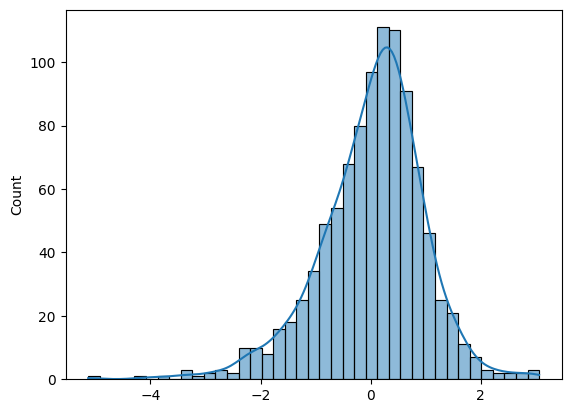

In [95]:
sns.histplot(y_test.to_numpy() - y_pred_1, kde=True)

In [96]:
from scipy.stats import ttest_1samp, shapiro

In [97]:
(y_test.to_numpy() - y_pred_1).mean()

0.026449404137806186

$H_{0} : μ_{y_{test}−y_{pred}}=0$ vs. $μ_{y_{test}−y_{pred}}≠0$

In [98]:
ttest_1samp(y_test.to_numpy() - y_pred_1, 0)

TtestResult(statistic=0.8742945639360183, pvalue=0.382171406162246, df=983)

The **p-value** is 0.382, there is not enough evident to reject $H_{0}$ .

We use Shapiro-Wilk test to test whether the error terms are normally distributed:

In [99]:
shapiro(y_test.to_numpy() - y_pred_1).pvalue

9.397661820823369e-14

The **p-value** is low, we reject the null hypothesis, i.e. the error is not normally distributed. Assumption is violated.

#### 3.3. SVM Model

In [100]:
from sklearn.svm import SVR

##### 3.3.1. Training

In [101]:
model_2 = SVR(kernel="linear")
model_2.fit(X_train, y_train)

SVR(kernel='linear')

##### 3.3.2. Testing

In [102]:
y_pred_2 = model_2.predict(X_test)
y_pred_2[:5]

array([6.16019808, 5.99514343, 6.04541585, 6.67403496, 5.40562198])

In [103]:
error_2 = mean_absolute_error(y_true=y_test, y_pred=y_pred_2), mean_squared_error(y_true=y_test, y_pred=y_pred_2)
print("SVM\nMAE:", error_2[0], "\nMSE:", error_2[1])

SVM
MAE: 0.6973001287157182 
MSE: 0.9022612819345427


##### 3.3.3. Kernel Methods

We shall use the **RBF** kernel.

In [104]:
model_3 = SVR(kernel="rbf")
model_3.fit(X_train, y_train)

SVR()

In [105]:
y_pred_3 = model_3.predict(X_test)
y_pred_3[:5]

array([6.35375482, 6.69555343, 6.92695282, 6.84420836, 6.00501154])

In [106]:
error_3 = mean_absolute_error(y_true=y_test, y_pred=y_pred_3), mean_squared_error(y_true=y_test, y_pred=y_pred_3)
print("SVM with RBF kernel\nMAE:", error_3[0], "\nMSE:", error_3[1])

SVM with RBF kernel
MAE: 0.7327426839080937 
MSE: 0.9517097172769231


<Axes: ylabel='Count'>

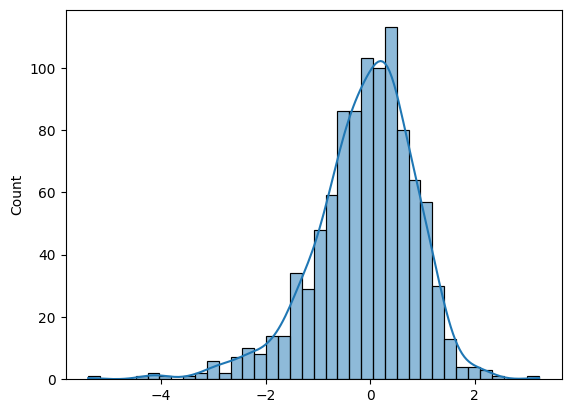

In [107]:
sns.histplot(y_test.to_numpy() - y_pred_3, kde=True)

#### 3.4 Decision Tree Model

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
decision_tree_error = dict()
print("Decision Tree Model:\n")
for max_depth in range(3, 21):
  model_4 = DecisionTreeRegressor(max_depth=max_depth)
  np.random.seed(42)
  model_4.fit(X_train, y_train)
  y_pred_4 = model_4.predict(X_test)
  error_4 = mean_absolute_error(y_true=y_test, y_pred=y_pred_4), mean_squared_error(y_true=y_test, y_pred=y_pred_4)
  decision_tree_error[max_depth] = error_4
  print(f"Max depth={max_depth}\nMAE: {error_4[0]}\nMSE: {error_4[1]}\n")

Decision Tree Model:

Max depth=3
MAE: 0.760600105984986
MSE: 1.0054508057562692

Max depth=4
MAE: 0.7418899100498835
MSE: 0.9751077111476427

Max depth=5
MAE: 0.720211738036062
MSE: 0.9148118593369564

Max depth=6
MAE: 0.7089199876985726
MSE: 0.8986140030117229

Max depth=7
MAE: 0.705809656349275
MSE: 0.906333540894089

Max depth=8
MAE: 0.717806448378118
MSE: 0.9188448349365642

Max depth=9
MAE: 0.723350493949258
MSE: 0.9590106990573107

Max depth=10
MAE: 0.7437172072142233
MSE: 1.0460617207314777

Max depth=11
MAE: 0.7531949207334697
MSE: 1.0397065859184764

Max depth=12
MAE: 0.774531750930197
MSE: 1.116302021729266

Max depth=13
MAE: 0.775210276486226
MSE: 1.132697134135122

Max depth=14
MAE: 0.80020231303522
MSE: 1.1658371202455717

Max depth=15
MAE: 0.8033860717473944
MSE: 1.18545975641297

Max depth=16
MAE: 0.8338052870178606
MSE: 1.3253099552181047

Max depth=17
MAE: 0.8224007680186303
MSE: 1.2865479266462119

Max depth=18
MAE: 0.8456856758133801
MSE: 1.3406534584186498

Max dep

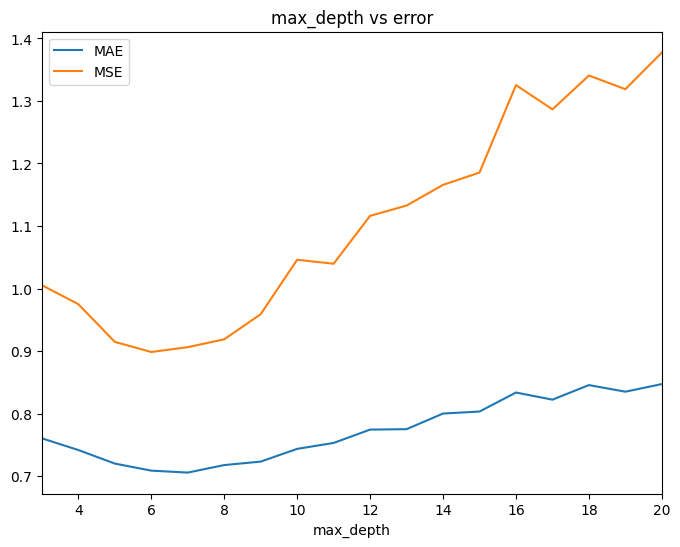

In [110]:
plt.figure(figsize=(8, 6))
plt.title("max_depth vs error")
plt.xlabel("max_depth")
plt.xlim((3, 20))
plt.plot(list(decision_tree_error.keys()), [item[0] for item in decision_tree_error.values()], label="MAE")
plt.plot(list(decision_tree_error.keys()), [item[1] for item in decision_tree_error.values()], label="MSE")
plt.legend()
plt.show()

In [111]:
print("MAE, MSE")
print(f"max_depth = 6: {decision_tree_error[6]}\nmax_depth = 7: {decision_tree_error[7]}")

MAE, MSE
max_depth = 6: (0.7089199876985726, 0.8986140030117229)
max_depth = 7: (0.705809656349275, 0.906333540894089)


Either `max_depth = 6` or `max_depth = 7` is good, but I choose `max_depth = 6`.

In [112]:
decision_tree_error[6][0] + decision_tree_error[6][1] - decision_tree_error[7][0] - decision_tree_error[7][1]

-0.004609206533068511

In [113]:
model_4 = DecisionTreeRegressor(max_depth=6)
np.random.seed(42)
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
error_4 = mean_absolute_error(y_true=y_test, y_pred=y_pred_4), mean_squared_error(y_true=y_test, y_pred=y_pred_4)
decision_tree_error[max_depth] = error_4
print(f"Max depth=6\nMAE: {error_4[0]}\nMSE: {error_4[1]}\n")

Max depth=6
MAE: 0.7089199876985726
MSE: 0.8986140030117229



<Axes: ylabel='Count'>

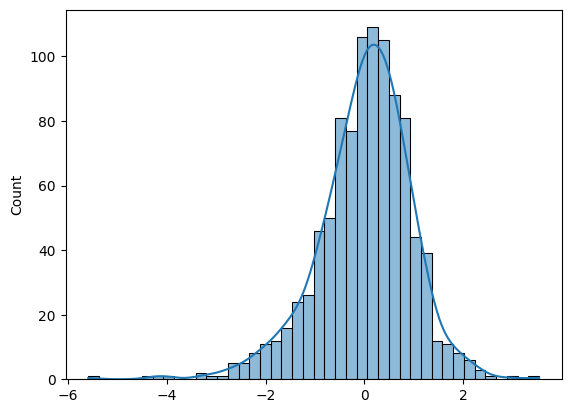

In [114]:
sns.histplot(y_test.to_numpy() - y_pred_4, kde=True)

In [117]:
from sklearn.tree import export_graphviz

export_graphviz(model_4, out_file="tree")

#### 3.5. Polynomial Linear Regression

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
for i in range(2, 5):
  X_5_train, X_5_test = X_train.copy(), X_test.copy()
  poly = PolynomialFeatures(i)
  X_5_train = poly.fit_transform(X_5_train)
  model_5 = LinearRegression()
  model_5.fit(X_5_train, y_train)
  y_5_pred = model_5.predict(poly.fit_transform(X_5_test))
  print(i, mean_absolute_error(y_true=y_test.to_numpy(), y_pred=y_5_pred))

2 0.6803713583282602
3 2.5701069273420485
4 14.34504894730493


In [120]:
X_5_train, X_5_test = X_train.copy(), X_test.copy()
poly = PolynomialFeatures(2)
X_5_train = poly.fit_transform(X_5_train)
model_5 = LinearRegression()
model_5.fit(X_5_train, y_train)
y_5_pred = model_5.predict(poly.fit_transform(X_5_test))

In [121]:
r2_score(y_true=y_test, y_pred=y_5_pred)

0.3402297003331174

The $R^{2}$ score is still very low, but a bit better than the previous models.

### 4. Conclusion

#### 4.1. Model Benchmarking

In [122]:
pd.DataFrame({"Linear Regression": error_1, "Linear SVM": error_2, "RBF kernel SVM": error_3, "Decision Tree (max_depth = 6)" : error_4, "Quadratic Polynomial" : (mean_absolute_error(y_true=y_test.to_numpy(), y_pred=y_5_pred), mean_squared_error(y_true=y_test.to_numpy(), y_pred=y_5_pred))}, index=["MAE", "MSE"])

,Linear Regression,Linear SVM,RBF kernel SVM,Decision Tree (max_depth = 6),Quadratic Polynomial
MAE,0.715744,0.697300,0.732743,0.708920,0.680371
MSE,0.900342,0.902261,0.951710,0.898614,0.835558


Until now, we can see that the **Quadratic Polynomial** best fits the data

### 4.2. What causes the models to fail?

- Obviously, linear regression fails because there is no linear relationship between dependent and independent variables.
- Linear regression fails because the range of `imdb_score` is $[0,10]$.
- Reason why other models fail: Movie metadata is not sufficient to predict imdb score.